In [71]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import random
from scipy.special import comb
from PIL import Image

# QUESTION 1

In [2]:
def chebyshev_nodes(n):
    nodes = []
    for k in range(1,n+1):
        nodes = nodes + [np.cos((2*k-1)*np.pi/(2*n))]
    nodes.sort()
    return nodes

In [3]:
def lagrange_coef(nodes, n, x):
    phi_k = []
    for k in range (0,n):
        phi = 1
        for i in range(0,n):
            if i != k:
                phi = phi * (x-nodes[i]) / (nodes[k] - nodes[i])
        phi_k = phi_k + [phi]
    return phi_k

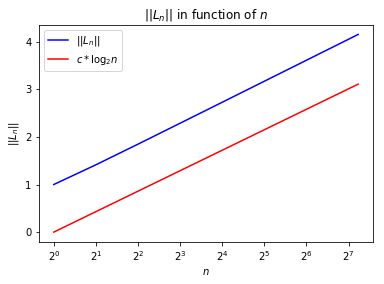

In [27]:
n=150
plotting1 = []
plotting2 = []
for i in range(1,n+1):
    sum_pos_1 = np.sum(np.absolute(lagrange_coef(chebyshev_nodes(i),i,1)))
    sum_neg_1 = np.sum(np.absolute(lagrange_coef(chebyshev_nodes(i),i,-1)))
    tmp = [sum_pos_1, sum_neg_1]
    plotting1 = plotting1 + [np.amax(tmp)]
    plotting2 = plotting2 + [i]
    
plt.title('$||L_n||$ in function of $n$')
plt.xlabel('$n$')
plt.ylabel('$||L_n||$')

plt.plot(plotting2,plotting1,'blue',label="$||L_n||$")
plt.plot(np.linspace(1,n),0.43*np.log2(np.linspace(1,n)),'red',label="$c*\log_2{n}$")
plt.xscale('log', basex=2)
plt.legend()
plt.show()

So in the assumed dependance $||L_n||=c*\log_2{n}$, we see that $c\approx 0.43$.

# QUESTION 2

In [15]:
def equidistant_nodes(a,b,n):
    return np.linspace(a,b,n)

In [16]:
def lagrange_coef_0(j,nodes,n,x):
    product = 1
    for i in range(0,n):
        if i != j:
            product = product * (x - nodes[i]) / (nodes[j] - nodes[i])
    return product

In [17]:
def lagrange_coef_dx(j,nodes,n,x):
    summation = 0
    for l in range(0,n):
        if l != j:
            product = 1
            for m in range(0,n):
                if m != l and m != j:
                    product = product * (x - nodes[m]) / (nodes[j] - nodes[m])
            summation = summation + np.sign(lagrange_coef_0(j,nodes,n,x)) * product / (nodes[j] - nodes[l])
    return summation

def sum_dx(n,nodes,x):
    summation=0
    for i in range(0,n):
        summation = summation + lagrange_coef_dx(i,nodes,n,x)
    return summation

In [18]:
def lagrange_coef_dx_dx(j,nodes,n,x):
    summation1 = 0
    for l in range(0,n):
        if l != j:
            summation2 = 0
            for m in range(0,n):
                if m != l and m != j:
                    product = 1
                    for k in range(0,n):
                        if k != m and k != j and k != l:
                            product = product * (x-nodes[k]) / (nodes[j] - nodes[k])
                    summation2 = summation2 + product / (nodes[j] - nodes[m])
            summation1 = summation1 + np.sign(lagrange_coef_0(j,nodes,n,x)) * summation2 / (nodes[j] - nodes[l])
    return summation1

def sum_dx_dx(n,nodes,x):
    summation=0
    for i in range(0,n):
        summation = summation + lagrange_coef_dx_dx(i,nodes,n,x)
    return summation

In [45]:
def newton_raphson(x0,nodes,eps,error,n):
    while(error>eps):
        error = np.absolute(x0 - (x0 - sum_dx(n,nodes,x0) / sum_dx_dx(n,nodes,x0)))
        x0 = x0 - sum_dx(n,nodes,x0) / sum_dx_dx(n,nodes,x0)
    return x0
    

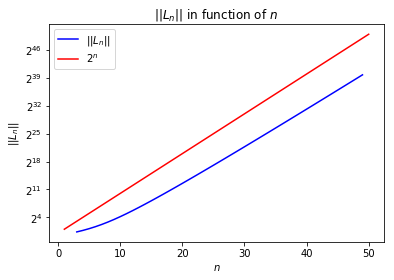

In [28]:
n=50
plotting1 = []
plotting2 = []
for i in range(3,n):
    maximum = newton_raphson((2+(2-1/(i-1)))/2,equidistant_nodes(0,2,i),0.001,np.inf,i)
    delta_max = np.sum(np.absolute(lagrange_coef(equidistant_nodes(0,2,i),i,maximum)))
    plotting1 = plotting1 + [delta_max]
    plotting2 = plotting2 + [i]
    
plt.title('$||L_n||$ in function of $n$')
plt.xlabel('$n$')
plt.ylabel('$||L_n||$')

plt.plot(plotting2,plotting1,'blue',label="$||L_n||$")
plt.plot(np.linspace(1,n),np.power(2,np.linspace(1,n)),'red',label="$2^n$")
plt.yscale('log', basey=2)
plt.legend()
plt.show()

We clearly see that $||L_n|| \sim 2^n$. I used the Newton-Raphson method to maximize the $x$ of $\lambda_n(x)$.

# QUESTION 3

In [32]:
def fun_sin (n,x):
    return np.absolute(np.sin((n+1/2)*x)/(2*np.sin(x/2)))

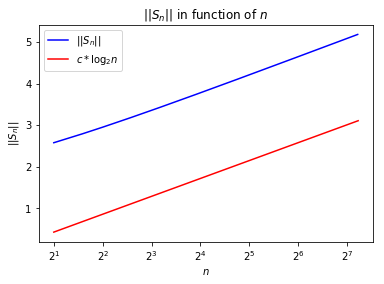

In [60]:
n=150
number_points = 10000
nodes = equidistant_nodes(0,np.pi,number_points)
plotting1= []
plotting2 = []
for j in range(2,n):
    summation = 0
    for i in range(1,number_points):
        if i == 1 or i == (number_points - 1):
            summation = summation + fun_sin(j,nodes[i]) * (np.pi/number_points)/2
        else:
            summation = summation + fun_sin(j,nodes[i]) * (np.pi/number_points)
    plotting1 = plotting1 + [summation]
    plotting2 = plotting2 + [j]
        
plt.title('$||S_n||$ in function of $n$')
plt.xlabel('$n$')
plt.ylabel('$||S_n||$')

plt.plot(plotting2,plotting1,'blue',label="$||S_n||$")
plt.plot(np.linspace(2,n),0.43*np.log2(np.linspace(2,n)),'red',label="$c*\log_2{n}$")
plt.xscale('log', basex=2)
plt.legend()
plt.show()

So in the assumed dependance $||S_n||=c*\log_2{n}$, we see that $c\approx 0.43$, as in question $1$.

# QUESTION 4

In [157]:
def legendre_coef_0(n,x):
    a = 1
    b = x
    c = 0
    if n == 0:
        return 1.0
    if n == 1:
        return x
    for i in range(1,n):
        c = ((2 * i + 1) * x * b - i * a) / (i + 1)
        a = b
        b = c
    return c


def fun_abs_sum(n,x):
    summation = 0
    for i in range(0,n+1):
        summation = summation + (i + 0.5) * legendre_coef_0(i,x)
    return np.absolute(summation)

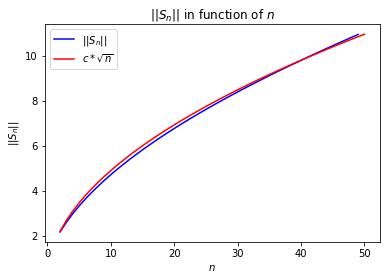

In [158]:
n=50
number_points = 10000
nodes = equidistant_nodes(-1,1,number_points)
plotting1= []
plotting2 = []
for j in range(2,n):
    summation = 0
    for i in range(1,number_points):
        if i == 1 or i == (number_points - 1):
            summation = summation + fun_abs_sum(j,nodes[i]) * (2/number_points)/2
        else:
            summation = summation + fun_abs_sum(j,nodes[i]) * (2/number_points)
    plotting1 = plotting1 + [summation]
    plotting2 = plotting2 + [j]
    
plt.title('$||S_n||$ in function of $n$')
plt.xlabel('$n$')
plt.ylabel('$||S_n||$')

plt.plot(plotting2,plotting1,'blue',label="$||S_n||$")
plt.plot(np.linspace(2,n),1.55*np.power(np.linspace(2,n),1/2),'red',label="$c*\sqrt{n}$")
plt.legend()
plt.show()

So in the assumed dependance $||S_n||=c*\sqrt{n}$, we see that $c\approx 0.55$.

# QUESTION 5

In [211]:
def lagrange_coef_0(j,nodes,n,x):
    product = 1
    for i in range(0,n):
        if i != j:
            product = product * (x - nodes[i]) / (nodes[j] - nodes[i])
    return product
lagrange_coef_0(4,equidistant_nodes(0,1,11),11,0.67)

0.13538135188703126

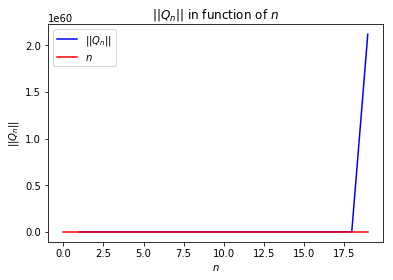

In [215]:
most=20
number_points = 10000
nodes = equidistant_nodes(0,1,number_points)
plotting1= []
plotting2 = []
for n in range(1,most):
    summation = 0
    for k in range(0,n+1):
        integral = 0
        for i in range(0,number_points):
            if i == 0 or i == (number_points - 1):
                integral = integral + lagrange_coef_0(k,nodes,n,nodes[i]) * (1/number_points)/2
            else:
                integral = integral + lagrange_coef_0(k,nodes,n,nodes[i]) * (1/number_points)
        summation = summation + np.absolute(integral)
    plotting1 = plotting1 + [summation]
    plotting2 = plotting2 + [n]

plt.title('$||Q_n||$ in function of $n$')
plt.xlabel('$n$')
plt.ylabel('$||Q_n||$')

plt.plot(plotting2,plotting1,'blue',label="$||Q_n||$")
plt.plot(np.linspace(0,n),np.linspace(0,n),'red',label="$n$")
plt.legend()
plt.show()